In [1]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [2]:
data = []
for file in sorted(os.listdir('Data')):
        with open('Data/'+file, mode='r') as tf:
            data = np.genfromtxt(tf,delimiter="\t").T

In [4]:
ord = data[0]
m1 = up.uarray(data[1],np.full(len(data[1]),0.05))

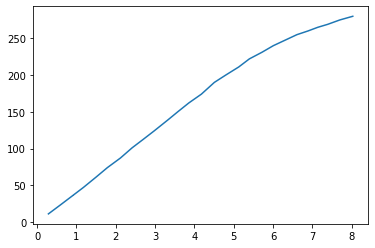

In [6]:
plt.errorbar(ord,up.nominal_values(m1),yerr=up.std_devs(m1))
plt.show()

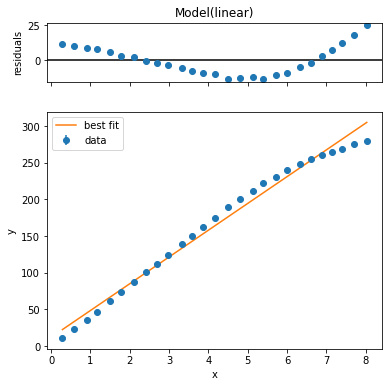

In [9]:
res1 = f.linear_fit(up.nominal_values(m1),ord,up.std_devs(m1))
res1.plot()
plt.show()

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 27
    # variables        = 2
    chi-square         = 1102355.98
    reduced chi-square = 44094.2393
    Akaike info crit   = 290.662331
    Bayesian info crit = 293.254005
[[Variables]]
    slope:      36.4897402 +/- 0.87028124 (2.39%) (init = 36.48974)
    intercept:  11.8792660 +/- 4.16747559 (35.08%) (init = 11.87927)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.875


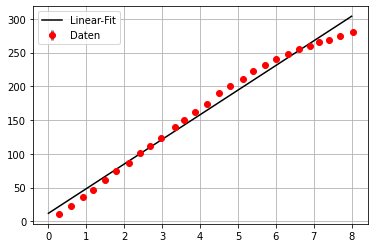

In [13]:
#Werte maskieren

res1 = f.linear_fit(up.nominal_values(m1),ord,up.std_devs(m1))
plt.show()
print(res1.fit_report())
plt.errorbar(ord,up.nominal_values(m1),yerr = up.std_devs(m1),fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.plot(np.arange(0,9),res1.eval(x=np.arange(0,9)),color='k',linestyle='-',alpha=1,label="Linear-Fit")




plt.grid()
plt.legend()